# **Model Prediksi Machine Learning** #

# **1. Preprocessing** #

## **Import Packages** ##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

## **Read & Modify Dataset** ##

In [ ]:
df = pd.read_excel("/content/Dataset Kasus DBD dan Iklim per Minggu 2017-2022.xlsx")

In [ ]:
df

,Waktu per Minggu,humidity,pressure,wind_speed,precipitation,temp,Kasus DBD Per Minggu
0,Minggu 1 Bulan 01 Tahun 2017,76.184066,1008.967949,2.682335,2.998571,27.675334,33
1,Minggu 2 Bulan 01 Tahun 2017,78.425000,1007.739762,2.093271,4.697143,27.492457,39
2,Minggu 3 Bulan 01 Tahun 2017,82.037857,1008.874048,3.046564,8.435714,26.531805,49
3,Minggu 4 Bulan 01 Tahun 2017,77.818095,1010.829286,3.373231,6.035714,27.125490,46
4,Minggu 5 Bulan 01 Tahun 2017,81.035714,1010.910714,2.522381,6.804286,26.595774,57
...,...,...,...,...,...,...,...
308,Minggu 4 Bulan 11 Tahun 2022,70.625000,1009.785714,2.115119,3.565714,28.729048,75
309,Minggu 1 Bulan 12 Tahun 2022,72.464286,1009.000000,1.011905,4.780000,28.920774,60
310,Minggu 2 Bulan 12 Tahun 2022,73.904762,1009.500000,1.284940,13.535714,28.085952,44
311,Minggu 3 Bulan 12 Tahun 2022,72.031923,1008.376630,2.261623,8.531429,28.758329,50


In [ ]:
df['Minggu']=np.arange(1,314,1)
df.drop('Waktu per Minggu',axis=1,inplace=True)
df.set_index('Minggu',drop=True,inplace=True)

In [ ]:
df

,humidity,pressure,wind_speed,precipitation,temp,Kasus DBD Per Minggu
Minggu,,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334,33
2,78.425000,1007.739762,2.093271,4.697143,27.492457,39
3,82.037857,1008.874048,3.046564,8.435714,26.531805,49
4,77.818095,1010.829286,3.373231,6.035714,27.125490,46
5,81.035714,1010.910714,2.522381,6.804286,26.595774,57
...,...,...,...,...,...,...
309,70.625000,1009.785714,2.115119,3.565714,28.729048,75
310,72.464286,1009.000000,1.011905,4.780000,28.920774,60
311,73.904762,1009.500000,1.284940,13.535714,28.085952,44


## **Check Data Informations** ##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 1 to 313
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   humidity              313 non-null    float64
 1   pressure              313 non-null    float64
 2   wind_speed            313 non-null    float64
 3   precipitation         313 non-null    float64
 4   temp                  313 non-null    float64
 5   Kasus DBD Per Minggu  313 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 17.1 KB


In [ ]:
df.describe(include="all")

,humidity,pressure,wind_speed,precipitation,temp,Kasus DBD Per Minggu
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,75.138801,1010.075956,2.022696,6.498512,27.713935,51.501597
std,7.154618,1.129227,0.560532,5.087446,0.774146,18.958478
min,51.470238,1006.660714,0.996845,0.000000,25.441423,19.000000
25%,70.994048,1009.324641,1.635982,2.452857,27.214643,39.000000
50%,75.815476,1010.232143,2.004464,5.464286,27.753274,48.000000
75%,80.564062,1010.829286,2.313831,9.097143,28.259524,61.000000
max,88.014762,1013.156429,4.161826,26.878571,29.767262,147.000000


## **Check Missing Values and Duplicated Values** ##

In [ ]:
df.isna().sum()

humidity                0
pressure                0
wind_speed              0
precipitation           0
temp                    0
Kasus DBD Per Minggu    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## **Dealing with Outliers** ##

### **IQR** ###

<Axes: >

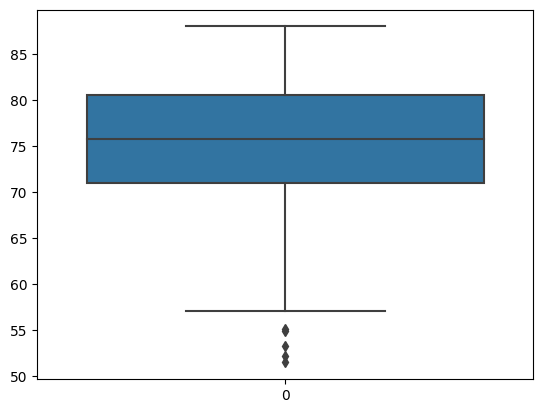

In [ ]:
sns.boxplot(df["humidity"].values)

<Axes: >

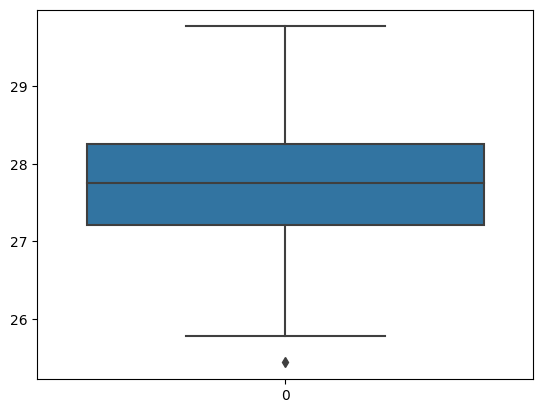

In [ ]:
sns.boxplot(df["temp"].values)

<Axes: >

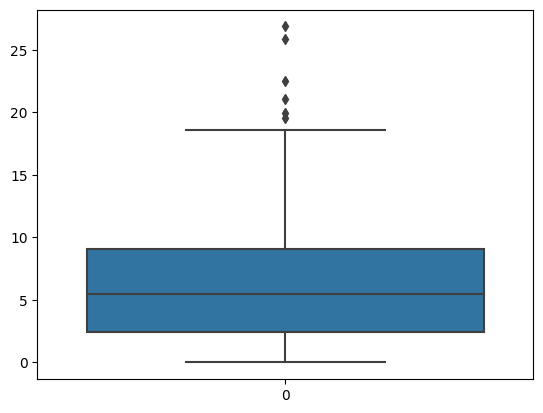

In [ ]:
sns.boxplot(df["precipitation"].values)

<Axes: >

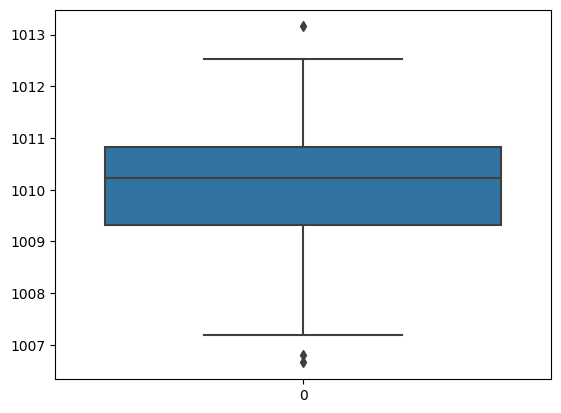

In [ ]:
sns.boxplot(df["pressure"].values)

<Axes: >

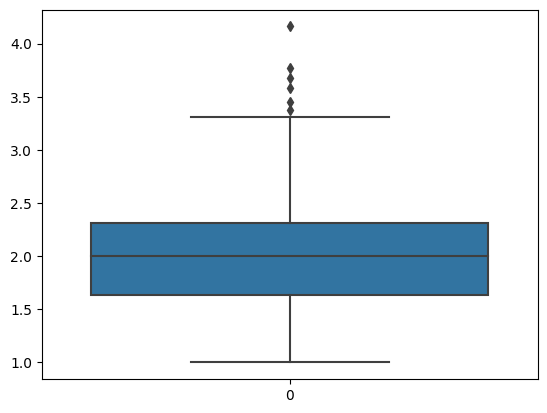

In [ ]:
sns.boxplot(df["wind_speed"].values)

<Axes: >

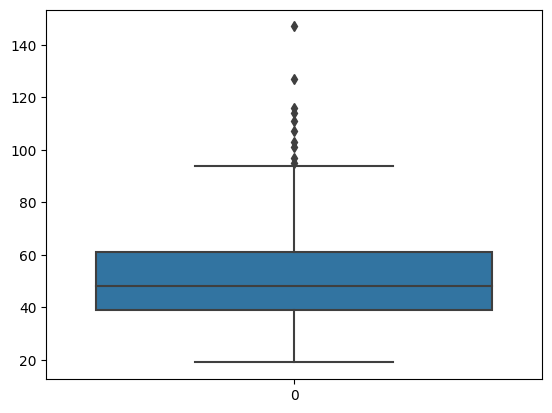

In [ ]:
sns.boxplot(df["Kasus DBD Per Minggu"].values)

In [ ]:
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['humidity'] < (Q1 - 1.5 * IQR)) | (df['humidity'] > (Q3 + 1.5 * IQR))
df = df[~outliers]

In [ ]:
df

,humidity,pressure,wind_speed,precipitation,temp,Kasus DBD Per Minggu
Minggu,,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334,33
2,78.425000,1007.739762,2.093271,4.697143,27.492457,39
3,82.037857,1008.874048,3.046564,8.435714,26.531805,49
4,77.818095,1010.829286,3.373231,6.035714,27.125490,46
5,81.035714,1010.910714,2.522381,6.804286,26.595774,57
...,...,...,...,...,...,...
309,70.625000,1009.785714,2.115119,3.565714,28.729048,75
310,72.464286,1009.000000,1.011905,4.780000,28.920774,60
311,73.904762,1009.500000,1.284940,13.535714,28.085952,44


In [ ]:
Q1 = df['pressure'].quantile(0.25)
Q3 = df['pressure'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['pressure'] < (Q1 - 1.5 * IQR)) | (df['pressure'] > (Q3 + 1.5 * IQR))
df = df[~outliers]

In [ ]:
df

,humidity,pressure,wind_speed,precipitation,temp,Kasus DBD Per Minggu
Minggu,,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334,33
2,78.425000,1007.739762,2.093271,4.697143,27.492457,39
3,82.037857,1008.874048,3.046564,8.435714,26.531805,49
4,77.818095,1010.829286,3.373231,6.035714,27.125490,46
5,81.035714,1010.910714,2.522381,6.804286,26.595774,57
...,...,...,...,...,...,...
309,70.625000,1009.785714,2.115119,3.565714,28.729048,75
310,72.464286,1009.000000,1.011905,4.780000,28.920774,60
311,73.904762,1009.500000,1.284940,13.535714,28.085952,44


In [ ]:
Q1 = df['wind_speed'].quantile(0.25)
Q3 = df['wind_speed'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['wind_speed'] < (Q1 - 1.5 * IQR)) | (df['wind_speed'] > (Q3 + 1.5 * IQR))
df = df[~outliers]

In [ ]:
df

,humidity,pressure,wind_speed,precipitation,temp,Kasus DBD Per Minggu
Minggu,,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334,33
2,78.425000,1007.739762,2.093271,4.697143,27.492457,39
3,82.037857,1008.874048,3.046564,8.435714,26.531805,49
5,81.035714,1010.910714,2.522381,6.804286,26.595774,57
6,83.381905,1010.069286,2.854950,12.061429,25.891250,37
...,...,...,...,...,...,...
309,70.625000,1009.785714,2.115119,3.565714,28.729048,75
310,72.464286,1009.000000,1.011905,4.780000,28.920774,60
311,73.904762,1009.500000,1.284940,13.535714,28.085952,44


In [ ]:
Q1 = df['precipitation'].quantile(0.25)
Q3 = df['precipitation'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['precipitation'] < (Q1 - 1.5 * IQR)) | (df['precipitation'] > (Q3 + 1.5 * IQR))
df = df[~outliers]

In [ ]:
df

,humidity,pressure,wind_speed,precipitation,temp,Kasus DBD Per Minggu
Minggu,,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334,33
2,78.425000,1007.739762,2.093271,4.697143,27.492457,39
3,82.037857,1008.874048,3.046564,8.435714,26.531805,49
5,81.035714,1010.910714,2.522381,6.804286,26.595774,57
6,83.381905,1010.069286,2.854950,12.061429,25.891250,37
...,...,...,...,...,...,...
309,70.625000,1009.785714,2.115119,3.565714,28.729048,75
310,72.464286,1009.000000,1.011905,4.780000,28.920774,60
311,73.904762,1009.500000,1.284940,13.535714,28.085952,44


In [ ]:
Q1 = df['temp'].quantile(0.25)
Q3 = df['temp'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['temp'] < (Q1 - 1.5 * IQR)) | (df['temp'] > (Q3 + 1.5 * IQR))
df = df[~outliers]

In [ ]:
df

,humidity,pressure,wind_speed,precipitation,temp,Kasus DBD Per Minggu
Minggu,,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334,33
2,78.425000,1007.739762,2.093271,4.697143,27.492457,39
3,82.037857,1008.874048,3.046564,8.435714,26.531805,49
5,81.035714,1010.910714,2.522381,6.804286,26.595774,57
6,83.381905,1010.069286,2.854950,12.061429,25.891250,37
...,...,...,...,...,...,...
309,70.625000,1009.785714,2.115119,3.565714,28.729048,75
310,72.464286,1009.000000,1.011905,4.780000,28.920774,60
311,73.904762,1009.500000,1.284940,13.535714,28.085952,44


## **Split Dataset (predictor X, target y)** ##

In [ ]:
X = df.drop("Kasus DBD Per Minggu", axis=1)
y = df["Kasus DBD Per Minggu"]

In [ ]:
# ga jadi, nanti aja abis train-test-split di tahap model
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# **2. EDA**

In [ ]:
df

,humidity,pressure,wind_speed,precipitation,temp,Kasus DBD Per Minggu
Minggu,,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334,33
2,78.425000,1007.739762,2.093271,4.697143,27.492457,39
3,82.037857,1008.874048,3.046564,8.435714,26.531805,49
5,81.035714,1010.910714,2.522381,6.804286,26.595774,57
6,83.381905,1010.069286,2.854950,12.061429,25.891250,37
...,...,...,...,...,...,...
309,70.625000,1009.785714,2.115119,3.565714,28.729048,75
310,72.464286,1009.000000,1.011905,4.780000,28.920774,60
311,73.904762,1009.500000,1.284940,13.535714,28.085952,44


In [ ]:
df.describe(include="all")

,humidity,pressure,wind_speed,precipitation,temp,Kasus DBD Per Minggu
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,75.252953,1010.084007,1.995637,6.178552,27.759224,51.354949
std,6.667948,1.062759,0.517011,4.563918,0.754249,18.813166
min,57.077381,1007.189524,0.996845,0.000000,25.866310,19.000000
25%,70.994048,1009.411565,1.633750,2.452857,27.294286,39.000000
50%,75.683095,1010.220238,2.008231,5.311429,27.791964,48.000000
75%,80.536752,1010.758826,2.297738,8.934286,28.283210,61.000000
max,88.014762,1012.535714,3.308571,18.625714,29.767262,147.000000


## Bar Chart

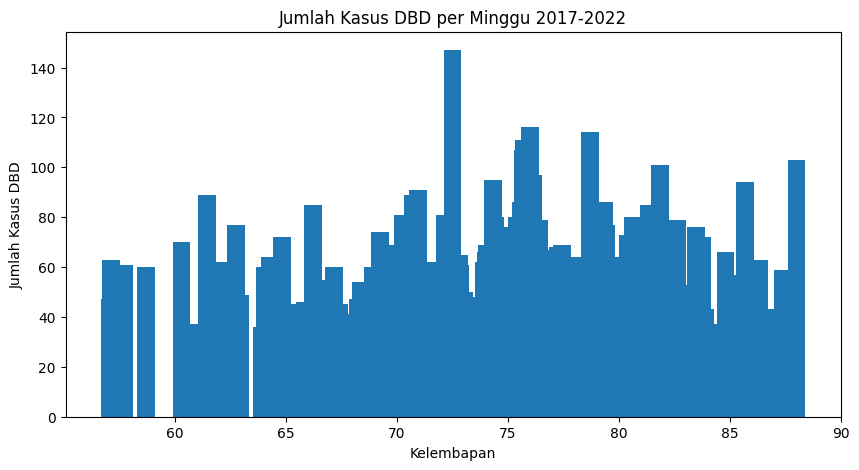

In [ ]:
# Bar chart Humidity - Kasus DBD
plt.figure(figsize=(10, 5))
plt.bar(df['humidity'], df['Kasus DBD Per Minggu'])
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Kasus DBD')
plt.title('Jumlah Kasus DBD per Minggu 2017-2022')
plt.show()

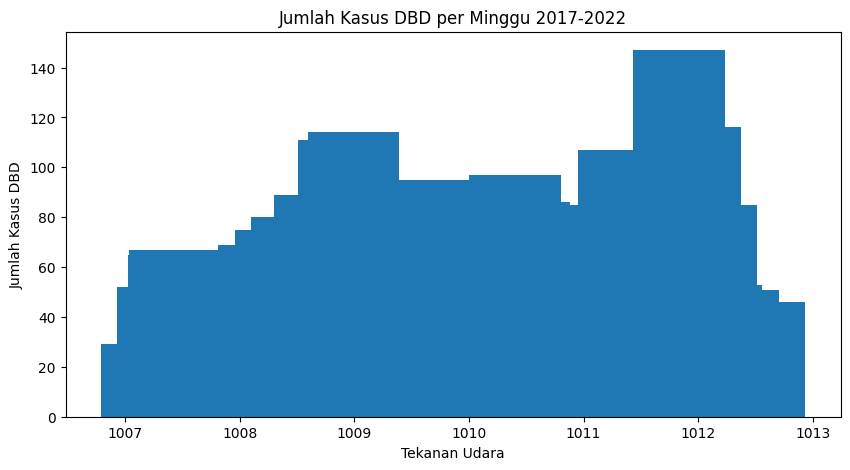

In [ ]:
# Bar chart Pressure - Kasus DBD
plt.figure(figsize=(10, 5))
plt.bar(df['pressure'], df['Kasus DBD Per Minggu'])
plt.xlabel('Tekanan Udara')
plt.ylabel('Jumlah Kasus DBD')
plt.title('Jumlah Kasus DBD per Minggu 2017-2022')
plt.show()

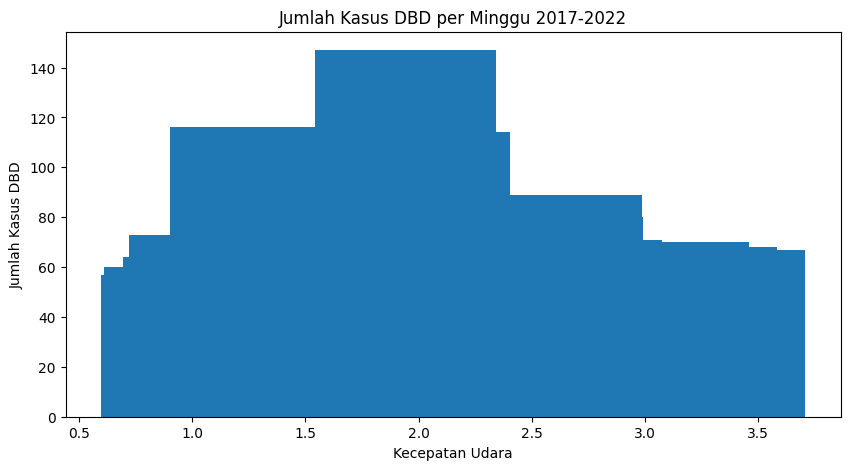

In [ ]:
# Bar chart Wind Speed - Kasus DBD
plt.figure(figsize=(10, 5))
plt.bar(df['wind_speed'], df['Kasus DBD Per Minggu'])
plt.xlabel('Kecepatan Udara')
plt.ylabel('Jumlah Kasus DBD')
plt.title('Jumlah Kasus DBD per Minggu 2017-2022')
plt.show()

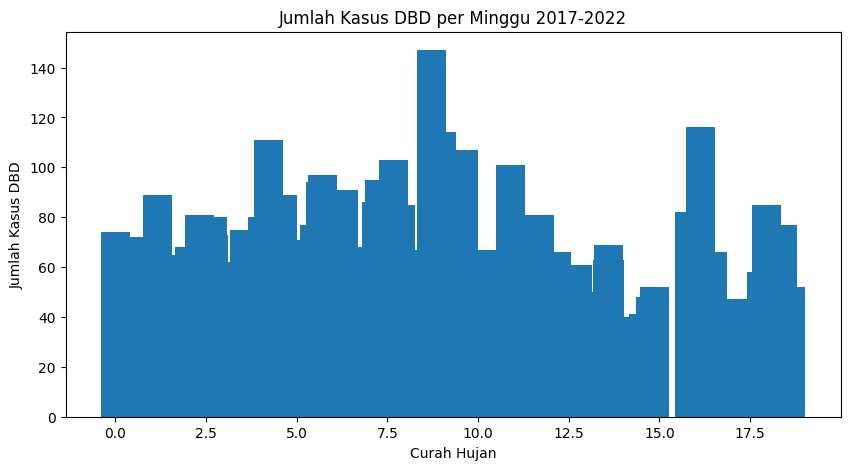

In [ ]:
# Bar chart Precipitation - Kasus DBD
plt.figure(figsize=(10, 5))
plt.bar(df['precipitation'], df['Kasus DBD Per Minggu'])
plt.xlabel('Curah Hujan')
plt.ylabel('Jumlah Kasus DBD')
plt.title('Jumlah Kasus DBD per Minggu 2017-2022')
plt.show()

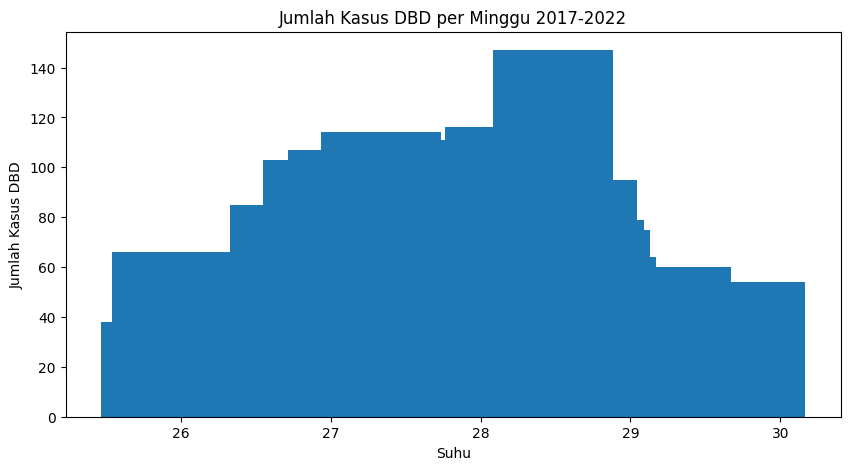

In [ ]:
# Bar chart Suhu - Kasus DBD
plt.figure(figsize=(10, 5))
plt.bar(df['temp'], df['Kasus DBD Per Minggu'])
plt.xlabel('Suhu')
plt.ylabel('Jumlah Kasus DBD')
plt.title('Jumlah Kasus DBD per Minggu 2017-2022')
plt.show()

## Correlations

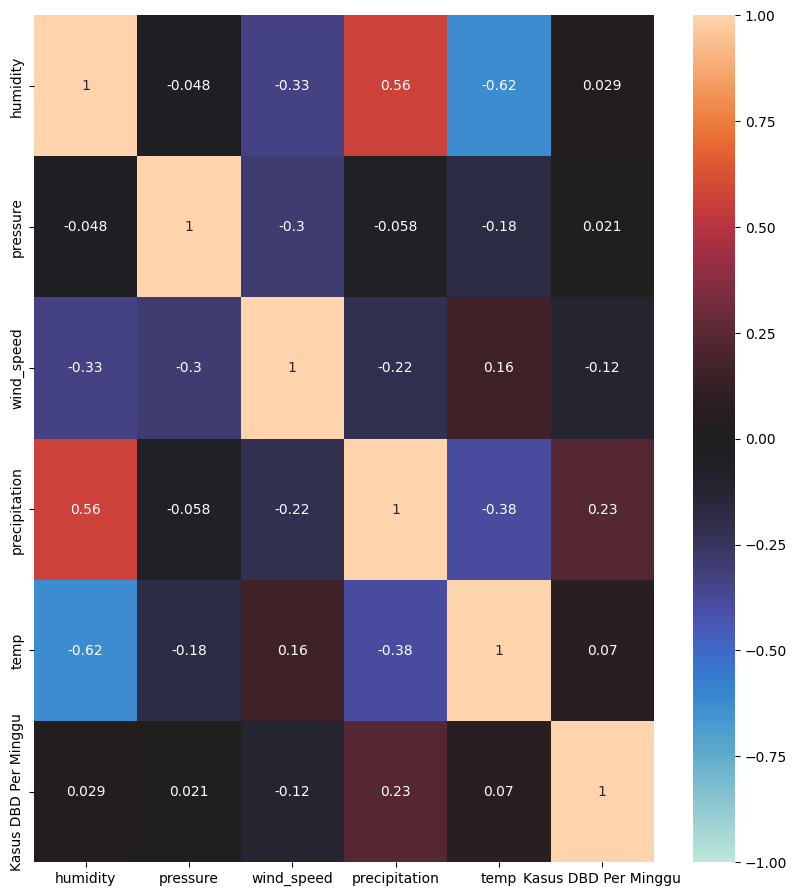

In [ ]:
corr = df.corr()
plt.subplots(figsize=(10,11))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

In [ ]:
col = []
for i in df.columns:
  col.append(i)

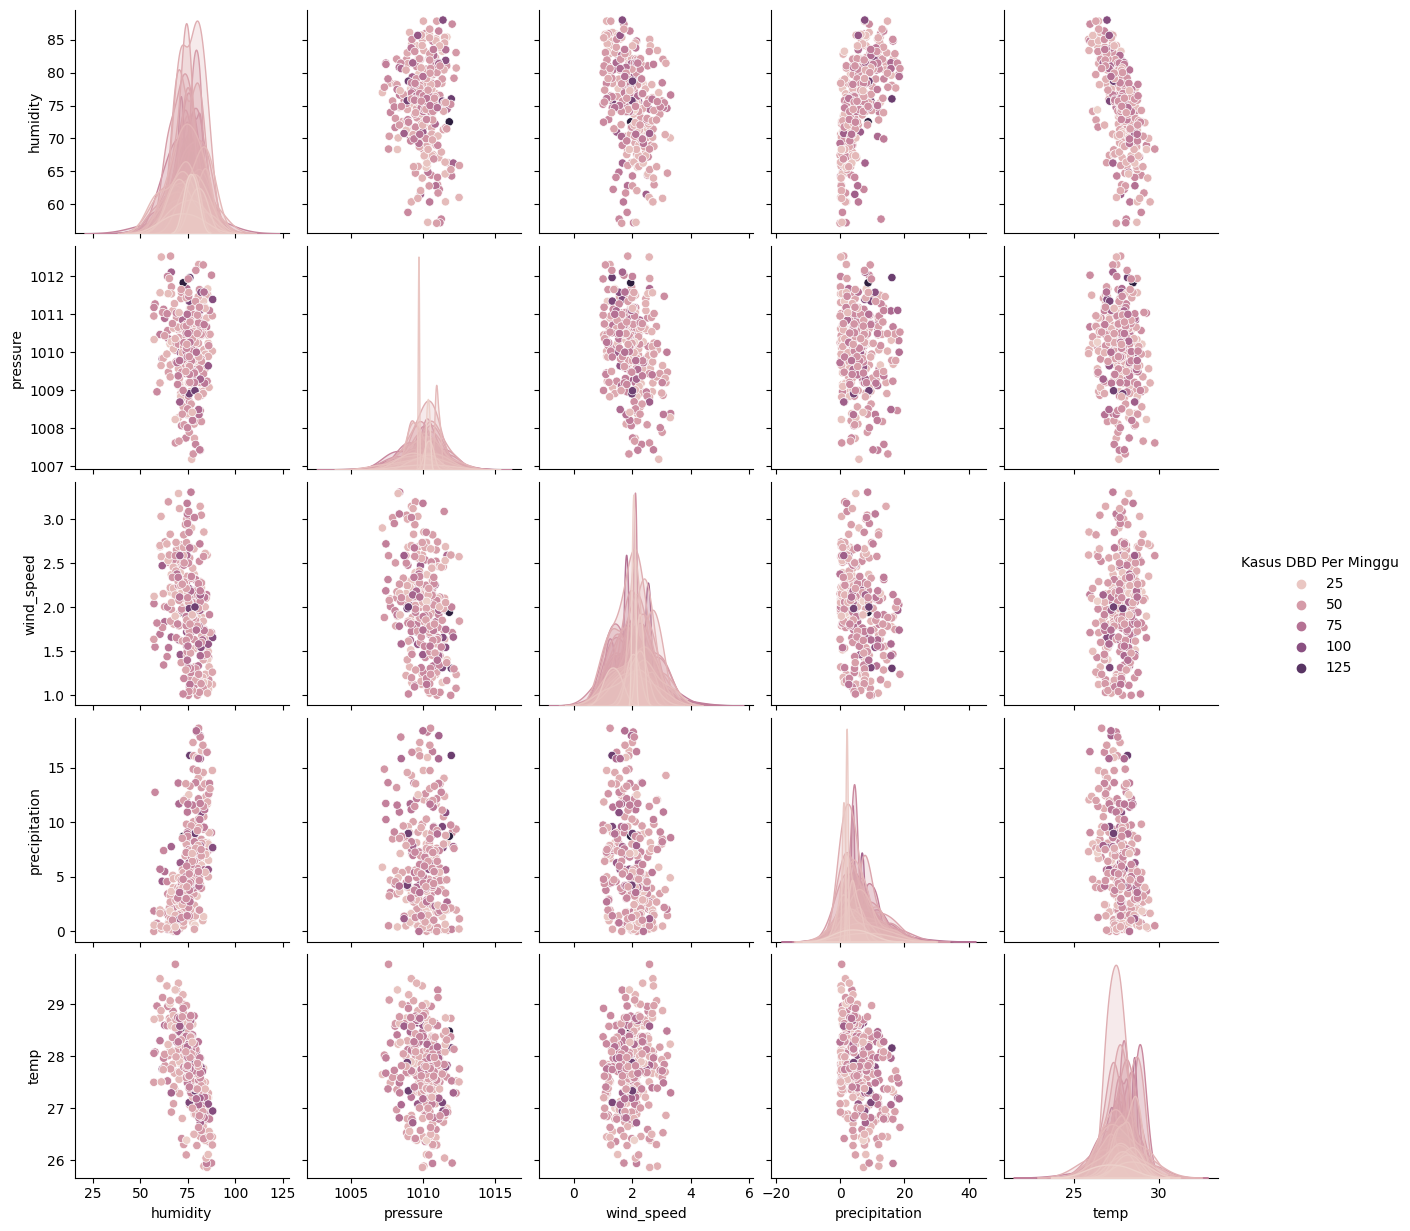

In [ ]:
#Menggunakan pairplot untuk melihat apakah ada relasi antar fitur
p = sns.pairplot(df[col], hue="Kasus DBD Per Minggu")

## Scatterplot

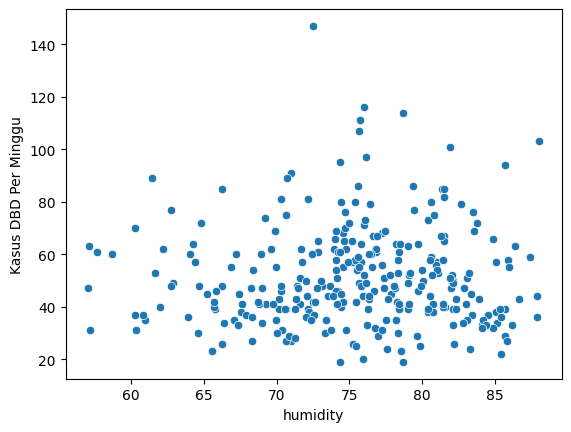

In [ ]:
# Scatterplot Humidity - DBD
sns.scatterplot(data=df, x="humidity", y="Kasus DBD Per Minggu", legend=False, sizes=(20, 2000))
plt.show()

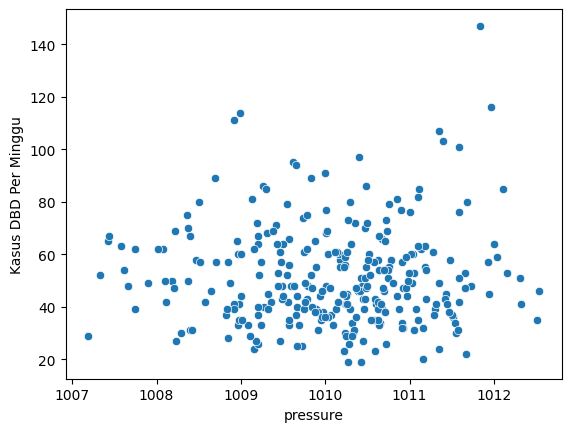

In [ ]:
# Scatterplot Pressure - DBD
sns.scatterplot(data=df, x="pressure", y="Kasus DBD Per Minggu", legend=False, sizes=(20, 2000))
plt.show()

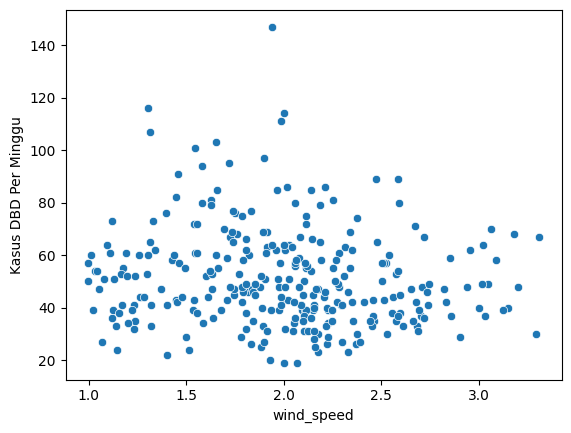

In [ ]:
# Scatterplot Wind Speed - DBD
sns.scatterplot(data=df, x="wind_speed", y="Kasus DBD Per Minggu", legend=False, sizes=(20, 2000))
plt.show()

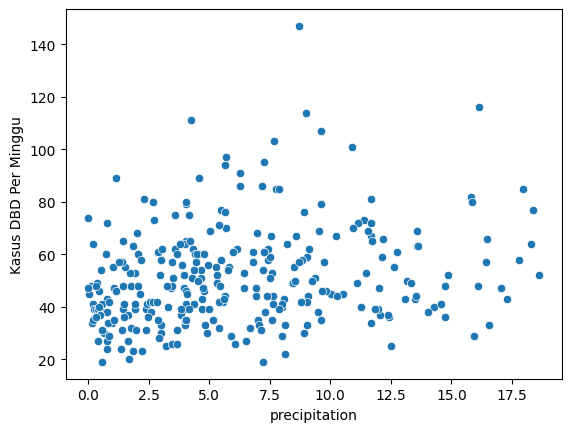

In [ ]:
# Scatterplot Precipitation - DBD
sns.scatterplot(data=df, x="precipitation", y="Kasus DBD Per Minggu", legend=False, sizes=(20, 2000))
plt.show()

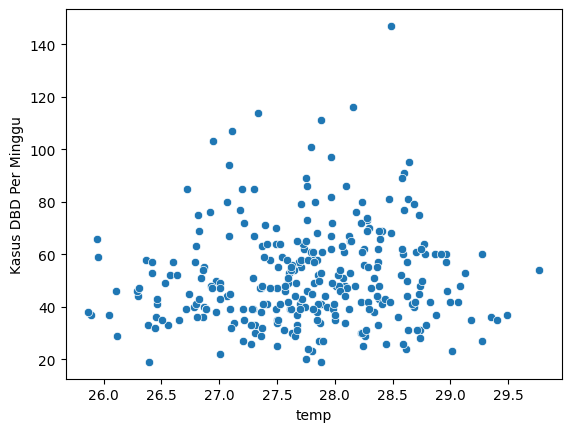

In [ ]:
# Scatterplot Temperature - DBD
sns.scatterplot(data=df, x="temp", y="Kasus DBD Per Minggu", legend=False, sizes=(20, 2000))
plt.show()

Dapat dilihat bahwa 'precipitation' memiliki hubungan positif linear, sedangkan keempat fitur lainnya tidak memiliki hubungan linear.

#**3. Model**

Polynomial regression adalah gabungan dari kedua langkah berikut:

1. *Feature engineering* dengan menambahkan fitur-fitur polinomial (berupa interaksi/perkalian dan pangkat) untuk variabel-variabel prediktor

2. Lakukan MLR pada dataset hasil *feature engineering*

In [ ]:
# feature engineering untuk polynomial regression (Polynomial Features)
from sklearn.preprocessing import PolynomialFeatures

# untuk OLS/MLR
import statsmodels.api as sm

# untuk train test split
from sklearn.model_selection import train_test_split

# tiga metode scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
dict_nama_variabel = {"humidity": "(x0)", "pressure": "(x1)",
                      "wind_speed": "(x2)", "precipitation": "(x3)",
                      "temp": "(x4)"}

## Train-test split

In [ ]:
X

,humidity,pressure,wind_speed,precipitation,temp
Minggu,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334
2,78.425000,1007.739762,2.093271,4.697143,27.492457
3,82.037857,1008.874048,3.046564,8.435714,26.531805
5,81.035714,1010.910714,2.522381,6.804286,26.595774
6,83.381905,1010.069286,2.854950,12.061429,25.891250
...,...,...,...,...,...
309,70.625000,1009.785714,2.115119,3.565714,28.729048
310,72.464286,1009.000000,1.011905,4.780000,28.920774
311,73.904762,1009.500000,1.284940,13.535714,28.085952


In [ ]:
y

Minggu
1      33
2      39
3      49
5      57
6      37
       ..
309    75
310    60
311    44
312    50
313    31
Name: Kasus DBD Per Minggu, Length: 293, dtype: int64

In [ ]:
X_train = X[:234]
y_train = y[:234]

X_test = X[234:]
y_test = y[234:]

In [ ]:
X_train

,humidity,pressure,wind_speed,precipitation,temp
Minggu,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334
2,78.425000,1007.739762,2.093271,4.697143,27.492457
3,82.037857,1008.874048,3.046564,8.435714,26.531805
5,81.035714,1010.910714,2.522381,6.804286,26.595774
6,83.381905,1010.069286,2.854950,12.061429,25.891250
...,...,...,...,...,...
247,78.174023,1010.547877,2.663385,7.600000,26.503007
248,70.562517,1009.319728,3.121603,3.818571,27.698336
249,72.377919,1009.018450,2.098379,4.031429,29.181877


In [ ]:
X_test

,humidity,pressure,wind_speed,precipitation,temp
Minggu,,,,,
252,75.441178,1011.580069,2.051821,8.798571,28.481385
254,81.449014,1008.470818,2.062663,17.815714,27.586692
255,76.704935,1008.642165,2.330287,9.664286,28.046482
256,74.783148,1008.018677,2.952069,9.111429,27.730905
258,75.973639,1009.411565,2.674626,5.397143,27.395043
259,80.536752,1010.240511,1.986623,10.292857,27.656810
260,77.437928,1008.213451,1.911652,11.575714,28.410978
261,82.880502,1010.484869,1.746623,17.067143,26.937417
262,76.835720,1010.143528,1.906701,6.820000,27.890840


In [ ]:
y_train

Minggu
1      33
2      39
3      49
5      57
6      37
       ..
247    35
248    39
249    35
250    27
251    48
Name: Kasus DBD Per Minggu, Length: 234, dtype: int64

In [ ]:
y_test

Minggu
252     42
254     58
255     46
256     62
258     71
259     44
260     69
261     47
262     61
263     69
264     69
265     85
266    111
267    114
268     75
269     80
270     59
271     64
272     65
273     67
274     62
275     48
276     44
277     61
278     38
279     39
280     52
281     60
282     50
283     60
284     41
285     51
286     54
287     47
288     64
289     61
290     52
291     73
292     65
293     54
294     61
295     58
296     55
297     45
299     47
300     54
301     62
302     48
303     72
304     49
305     69
306     76
307     77
308     57
309     75
310     60
311     44
312     50
313     31
Name: Kasus DBD Per Minggu, dtype: int64

## *Polynomial regression* derajat 6

### Tanpa *scaling*

In [ ]:
X_train_numvar = X_train.rename(columns=dict_nama_variabel)

In [ ]:
X_train_numvar

,(x0),(x1),(x2),(x3),(x4)
Minggu,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334
2,78.425000,1007.739762,2.093271,4.697143,27.492457
3,82.037857,1008.874048,3.046564,8.435714,26.531805
5,81.035714,1010.910714,2.522381,6.804286,26.595774
6,83.381905,1010.069286,2.854950,12.061429,25.891250
...,...,...,...,...,...
247,78.174023,1010.547877,2.663385,7.600000,26.503007
248,70.562517,1009.319728,3.121603,3.818571,27.698336
249,72.377919,1009.018450,2.098379,4.031429,29.181877


In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly6 = PolynomialFeatures(degree=6)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_train_poly6 = poly6.fit_transform(X_train_numvar)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly6 = poly6.get_feature_names_out()

In [ ]:
print(vars_poly6)

['1' '(x0)' '(x1)' '(x2)' '(x3)' '(x4)' '(x0)^2' '(x0) (x1)' '(x0) (x2)'
 '(x0) (x3)' '(x0) (x4)' '(x1)^2' '(x1) (x2)' '(x1) (x3)' '(x1) (x4)'
 '(x2)^2' '(x2) (x3)' '(x2) (x4)' '(x3)^2' '(x3) (x4)' '(x4)^2' '(x0)^3'
 '(x0)^2 (x1)' '(x0)^2 (x2)' '(x0)^2 (x3)' '(x0)^2 (x4)' '(x0) (x1)^2'
 '(x0) (x1) (x2)' '(x0) (x1) (x3)' '(x0) (x1) (x4)' '(x0) (x2)^2'
 '(x0) (x2) (x3)' '(x0) (x2) (x4)' '(x0) (x3)^2' '(x0) (x3) (x4)'
 '(x0) (x4)^2' '(x1)^3' '(x1)^2 (x2)' '(x1)^2 (x3)' '(x1)^2 (x4)'
 '(x1) (x2)^2' '(x1) (x2) (x3)' '(x1) (x2) (x4)' '(x1) (x3)^2'
 '(x1) (x3) (x4)' '(x1) (x4)^2' '(x2)^3' '(x2)^2 (x3)' '(x2)^2 (x4)'
 '(x2) (x3)^2' '(x2) (x3) (x4)' '(x2) (x4)^2' '(x3)^3' '(x3)^2 (x4)'
 '(x3) (x4)^2' '(x4)^3' '(x0)^4' '(x0)^3 (x1)' '(x0)^3 (x2)' '(x0)^3 (x3)'
 '(x0)^3 (x4)' '(x0)^2 (x1)^2' '(x0)^2 (x1) (x2)' '(x0)^2 (x1) (x3)'
 '(x0)^2 (x1) (x4)' '(x0)^2 (x2)^2' '(x0)^2 (x2) (x3)' '(x0)^2 (x2) (x4)'
 '(x0)^2 (x3)^2' '(x0)^2 (x3) (x4)' '(x0)^2 (x4)^2' '(x0) (x1)^3'
 '(x0) (x1)^2 (x2)' '(x0) (x1)

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# tambahkan intercept/konstanta
X_train_poly6_wconst = sm.add_constant(X_train_poly6)

# Persiapan MLR, input data ke model
model_poly6 = sm.OLS(y_train, X_train_poly6_wconst)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly6)):
  model_poly6.exog_names[i] = vars_poly6[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly6 = model_poly6.fit()

In [ ]:
# Display regression summary for polynomial model;
# Tampilkan ringkasan model
print(results_poly6.summary())

                             OLS Regression Results                             
Dep. Variable:     Kasus DBD Per Minggu   R-squared:                       0.706
Model:                              OLS   Adj. R-squared:                  0.488
Method:                   Least Squares   F-statistic:                     3.246
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):           1.63e-10
Time:                          07:02:23   Log-Likelihood:                -878.10
No. Observations:                   234   AIC:                             1956.
Df Residuals:                       134   BIC:                             2302.
Df Model:                            99                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


In [ ]:
print(dict_nama_variabel)

{'humidity': '(x0)', 'pressure': '(x1)', 'wind_speed': '(x2)', 'precipitation': '(x3)', 'temp': '(x4)'}


In [ ]:
results_poly6_params = results_poly6.params

In [ ]:
print(results_poly6_params)

1                1.919082e-05
(x0)             7.459420e-08
(x1)            -1.836141e-07
(x2)            -2.263418e-07
(x3)             7.603681e-07
                     ...     
(x3)^4 (x4)^2   -3.139300e-06
(x3)^3 (x4)^3   -1.881894e-05
(x3)^2 (x4)^4    3.178102e-06
(x3) (x4)^5      5.401860e-06
(x4)^6          -1.176095e-06
Length: 462, dtype: float64


### Dengan StandardScaler untuk X_train

In [ ]:
X_stdscaler = StandardScaler()
X_stdscaler.fit(X_train)
X_train_stdscaled = X_stdscaler.transform(X_train)

In [ ]:
X_train_stdscaled

array([[ 0.18619295, -1.12774066,  1.25506281, -0.59831761, -0.08852695],
       [ 0.49720595, -2.2804574 ,  0.05873318, -0.22308992, -0.31959264],
       [ 0.99862433, -1.21587169,  1.99477578,  0.60278971, -1.53337935],
       ...,
       [-0.34205155, -1.0803425 ,  0.06910604, -0.3701514 ,  1.81499326],
       [-0.90749068, -1.81527652, -0.33908635, -1.17110001,  1.93254421],
       [-0.62746147, -2.34904605,  0.02646909, -0.54403741,  1.68762325]])

In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly6_stdscaled_x = PolynomialFeatures(degree=6)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly6_stdscaled_x = poly6_stdscaled_x.fit_transform(X_train_stdscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly6_stdscaled_x = poly6_stdscaled_x.get_feature_names_out()

In [ ]:
print(vars_poly6_stdscaled_x)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly6_stdscaled_x_wconst = sm.add_constant(X_poly6_stdscaled_x)

# Persiapan MLR, input data ke model
model_poly6_stdscaled_x = sm.OLS(y_train, X_poly6_stdscaled_x_wconst)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly6_stdscaled_x)):
  model_poly6_stdscaled_x.exog_names[i] = vars_poly6_stdscaled_x[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly6_stdscaled_x = model_poly6_stdscaled_x.fit()

In [ ]:
print(results_poly6_stdscaled_x.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                             OLS Regression Results                             
Dep. Variable:     Kasus DBD Per Minggu   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                       nan
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                          07:02:24   Log-Likelihood:                 5778.4
No. Observations:                   234   AIC:                        -1.109e+04
Df Residuals:                         0   BIC:                        -1.028e+04
Df Model:                           233                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
1                   

Perhatikan warning:

```
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
```

Artinya terjadi pembagian nol

### Dengan StandardScaler untuk X_train, y_train

In [ ]:
X_stdscaler = StandardScaler()
X_stdscaler.fit(X_train)
X_train_stdscaled = X_stdscaler.transform(X_train)

In [ ]:
y_stdscaler = StandardScaler()

# Agar menjadi array dua dimensi
y_train_reshape = y_train.values.reshape(-1, 1)
y_test_reshape = y_test.values.reshape(-1, 1)

y_stdscaler.fit(y_train_reshape)
y_train_stdscaled = y_stdscaler.transform(y_train_reshape)

In [ ]:
X_train_stdscaled

array([[ 0.18619295, -1.12774066,  1.25506281, -0.59831761, -0.08852695],
       [ 0.49720595, -2.2804574 ,  0.05873318, -0.22308992, -0.31959264],
       [ 0.99862433, -1.21587169,  1.99477578,  0.60278971, -1.53337935],
       ...,
       [-0.34205155, -1.0803425 ,  0.06910604, -0.3701514 ,  1.81499326],
       [-0.90749068, -1.81527652, -0.33908635, -1.17110001,  1.93254421],
       [-0.62746147, -2.34904605,  0.02646909, -0.54403741,  1.68762325]])

In [ ]:
y_train_stdscaled

array([[-0.85421258],
       [-0.53868655],
       [-0.01280982],
       [ 0.40789157],
       [-0.64386189],
       [-0.59127422],
       [ 0.51306691],
       [-0.48609887],
       [-1.0119756 ],
       [ 0.46047924],
       [-0.22316051],
       [-0.48609887],
       [-0.85421258],
       [-0.80162491],
       [-1.43267699],
       [-0.69644957],
       [-1.27491397],
       [-1.32750164],
       [-1.2223263 ],
       [-1.2223263 ],
       [-1.59044001],
       [-1.38008931],
       [-0.53868655],
       [-0.53868655],
       [-1.53785233],
       [-0.90680026],
       [-0.53868655],
       [-1.0119756 ],
       [-0.4335112 ],
       [-0.53868655],
       [-0.53868655],
       [-0.06539749],
       [-0.4335112 ],
       [-0.06539749],
       [-0.32833586],
       [-0.11798516],
       [-0.53868655],
       [-0.22316051],
       [-0.38092353],
       [ 0.77600528],
       [ 0.46047924],
       [ 0.67082993],
       [ 0.03977786],
       [-1.06456328],
       [-0.48609887],
       [ 0

In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly6_stdscaled_xy = PolynomialFeatures(degree=6)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly6_stdscaled_xy = poly6_stdscaled_xy.fit_transform(X_train_stdscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly6_stdscaled_xy = poly6_stdscaled_xy.get_feature_names_out()

In [ ]:
print(vars_poly6_stdscaled_xy)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly6_stdscaled_wconst_xy = sm.add_constant(X_poly6_stdscaled_xy)

# Persiapan MLR, input data ke model
model_poly6_stdscaled_xy = sm.OLS(y_train_stdscaled, X_poly6_stdscaled_wconst_xy)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly6_stdscaled_xy)):
  model_poly6_stdscaled_xy.exog_names[i] = vars_poly6_stdscaled_xy[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly6_stdscaled_xy = model_poly6_stdscaled_xy.fit()

In [ ]:
print(results_poly6_stdscaled_xy.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                        07:02:24   Log-Likelihood:                 6569.6
No. Observations:                 234   AIC:                        -1.267e+04
Df Residuals:                       0   BIC:                        -1.186e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
1                    1.0164        inf  

Perhatikan warning:

```
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
```

Artinya terjadi pembagian nol

### Dengan MinMaxScaler untuk X_train

In [ ]:
X_minmaxscaler = MinMaxScaler()
X_minmaxscaler.fit(X_train)
X_train_minmaxscaled = X_minmaxscaler.transform(X_train)

In [ ]:
X_train_minmaxscaled

array([[0.61759219, 0.33265274, 0.72910448, 0.1640741 , 0.46373925],
       [0.69002671, 0.10292153, 0.47428895, 0.25701556, 0.41685913],
       [0.80680638, 0.31508863, 0.88666169, 0.46158055, 0.17059814],
       ...,
       [0.49456475, 0.34209898, 0.47649835, 0.22058938, 0.84993788],
       [0.36287474, 0.19562996, 0.38955428, 0.02219964, 0.87378738],
       [0.42809317, 0.08925212, 0.46741677, 0.17751896, 0.82409622]])

In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly6_minmaxscaled_x = PolynomialFeatures(degree=6)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly6_minmaxscaled_x = poly6_minmaxscaled_x.fit_transform(X_train_minmaxscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly6_minmaxscaled_x = poly6_minmaxscaled_x.get_feature_names_out()

In [ ]:
print(vars_poly6_minmaxscaled_x)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly6_minmaxscaled_x_wconst = sm.add_constant(X_poly6_minmaxscaled_x)

# Persiapan MLR, input data ke model
model_poly6_minmaxscaled_x = sm.OLS(y_train, X_poly6_minmaxscaled_x_wconst)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly6_minmaxscaled_x)):
  model_poly6_minmaxscaled_x.exog_names[i] = vars_poly6_minmaxscaled_x[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly6_minmaxscaled_x = model_poly6_minmaxscaled_x.fit()

In [ ]:
print(results_poly6_minmaxscaled_x.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                             OLS Regression Results                             
Dep. Variable:     Kasus DBD Per Minggu   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                       nan
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                          07:02:25   Log-Likelihood:                 5121.3
No. Observations:                   234   AIC:                            -9775.
Df Residuals:                         0   BIC:                            -8966.
Df Model:                           233                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
1                -88

### Dengan MinMaxScaler untuk X_train, y_train

In [ ]:
X_minmaxscaler = MinMaxScaler()
X_minmaxscaler.fit(X_train)
X_train_minmaxscaled = X_minmaxscaler.transform(X_train)

In [ ]:
y_minmaxscaler = MinMaxScaler()

# Agar menjadi array dua dimensi
y_train_reshape = y_train.values.reshape(-1, 1)
y_test_reshape = y_test.values.reshape(-1, 1)

y_minmaxscaler.fit(y_train_reshape)
y_train_minmaxscaled = y_minmaxscaler.transform(y_train_reshape)

In [ ]:
X_train_minmaxscaled

array([[0.61759219, 0.33265274, 0.72910448, 0.1640741 , 0.46373925],
       [0.69002671, 0.10292153, 0.47428895, 0.25701556, 0.41685913],
       [0.80680638, 0.31508863, 0.88666169, 0.46158055, 0.17059814],
       ...,
       [0.49456475, 0.34209898, 0.47649835, 0.22058938, 0.84993788],
       [0.36287474, 0.19562996, 0.38955428, 0.02219964, 0.87378738],
       [0.42809317, 0.08925212, 0.46741677, 0.17751896, 0.82409622]])

In [ ]:
y_train_minmaxscaled

array([[0.109375 ],
       [0.15625  ],
       [0.234375 ],
       [0.296875 ],
       [0.140625 ],
       [0.1484375],
       [0.3125   ],
       [0.1640625],
       [0.0859375],
       [0.3046875],
       [0.203125 ],
       [0.1640625],
       [0.109375 ],
       [0.1171875],
       [0.0234375],
       [0.1328125],
       [0.046875 ],
       [0.0390625],
       [0.0546875],
       [0.0546875],
       [0.       ],
       [0.03125  ],
       [0.15625  ],
       [0.15625  ],
       [0.0078125],
       [0.1015625],
       [0.15625  ],
       [0.0859375],
       [0.171875 ],
       [0.15625  ],
       [0.15625  ],
       [0.2265625],
       [0.171875 ],
       [0.2265625],
       [0.1875   ],
       [0.21875  ],
       [0.15625  ],
       [0.203125 ],
       [0.1796875],
       [0.3515625],
       [0.3046875],
       [0.3359375],
       [0.2421875],
       [0.078125 ],
       [0.1640625],
       [0.3671875],
       [0.171875 ],
       [0.21875  ],
       [0.234375 ],
       [0.1953125],


In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly6_minmaxscaled_xy = PolynomialFeatures(degree=6)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly6_minmaxscaled_xy = poly6_minmaxscaled_xy.fit_transform(X_train_minmaxscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly6_minmaxscaled_xy = poly6_minmaxscaled_xy.get_feature_names_out()

In [ ]:
print(vars_poly6_minmaxscaled_xy)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly6_minmaxscaled_wconst_xy = sm.add_constant(X_poly6_minmaxscaled_xy)

# Persiapan MLR, input data ke model
model_poly6_minmaxscaled_xy = sm.OLS(y_train_minmaxscaled, X_poly6_minmaxscaled_wconst_xy)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly6_minmaxscaled_xy)):
  model_poly6_minmaxscaled_xy.exog_names[i] = vars_poly6_minmaxscaled_xy[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly6_minmaxscaled_xy = model_poly6_minmaxscaled_xy.fit()

In [ ]:
print(results_poly6_minmaxscaled_xy.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                        07:02:25   Log-Likelihood:                 6277.2
No. Observations:                 234   AIC:                        -1.209e+04
Df Residuals:                       0   BIC:                        -1.128e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
1                  -69.0545        inf  

### Dengan RobustScaler untuk X_train

In [ ]:
X_robustscaler = RobustScaler()
X_robustscaler.fit(X_train)
X_train_robustscaled = X_robustscaler.transform(X_train)

In [ ]:
X_train_robustscaled

array([[ 0.0919299 , -0.90558535,  0.96816646, -0.24209605, -0.07539276],
       [ 0.30526867, -1.7624206 ,  0.02297093,  0.01805054, -0.24724119],
       [ 0.64921565, -0.97109474,  1.55259852,  0.5906356 , -1.14995998],
       ...,
       [-0.2704184 , -0.87035344,  0.03116631, -0.08390767,  1.34029538],
       [-0.65828029, -1.41664322, -0.29133813, -0.63920796,  1.42772051],
       [-0.46619479, -1.81340379, -0.00252027, -0.20446341,  1.24556762]])

In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly6_robustscaled_x = PolynomialFeatures(degree=6)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly6_robustscaled_x = poly6_robustscaled_x.fit_transform(X_train_robustscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly6_robustscaled_x = poly6_robustscaled_x.get_feature_names_out()

In [ ]:
print(vars_poly6_robustscaled_x)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly6_robustscaled_x_wconst = sm.add_constant(X_poly6_robustscaled_x)

# Persiapan MLR, input data ke model
model_poly6_robustscaled_x = sm.OLS(y_train, X_poly6_robustscaled_x_wconst)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly6_robustscaled_x)):
  model_poly6_robustscaled_x.exog_names[i] = vars_poly6_robustscaled_x[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly6_robustscaled_x = model_poly6_robustscaled_x.fit()

In [ ]:
print(results_poly6_robustscaled_x.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                             OLS Regression Results                             
Dep. Variable:     Kasus DBD Per Minggu   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                       nan
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                          07:02:26   Log-Likelihood:                 5858.4
No. Observations:                   234   AIC:                        -1.125e+04
Df Residuals:                         0   BIC:                        -1.044e+04
Df Model:                           233                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
1                   

### Dengan RobustScaler untuk X_train, y_train

In [ ]:
X_robustcaler = RobustScaler()
X_robustcaler.fit(X_train)
X_train_robustscaled = X_robustcaler.transform(X_train)

In [ ]:
y_robustscaler = RobustScaler()

# Agar menjadi array dua dimensi
y_train_reshape = y_train.values.reshape(-1, 1)
y_test_reshape = y_test.values.reshape(-1, 1)

y_robustscaler.fit(y_train_reshape)
y_train_robustscaled = y_robustscaler.transform(y_train_reshape)

In [ ]:
X_train_robustscaled

array([[ 0.0919299 , -0.90558535,  0.96816646, -0.24209605, -0.07539276],
       [ 0.30526867, -1.7624206 ,  0.02297093,  0.01805054, -0.24724119],
       [ 0.64921565, -0.97109474,  1.55259852,  0.5906356 , -1.14995998],
       ...,
       [-0.2704184 , -0.87035344,  0.03116631, -0.08390767,  1.34029538],
       [-0.65828029, -1.41664322, -0.29133813, -0.63920796,  1.42772051],
       [-0.46619479, -1.81340379, -0.00252027, -0.20446341,  1.24556762]])

In [ ]:
y_train_robustscaled

array([[-0.55172414],
       [-0.27586207],
       [ 0.18390805],
       [ 0.55172414],
       [-0.36781609],
       [-0.32183908],
       [ 0.64367816],
       [-0.22988506],
       [-0.68965517],
       [ 0.59770115],
       [ 0.        ],
       [-0.22988506],
       [-0.55172414],
       [-0.50574713],
       [-1.05747126],
       [-0.4137931 ],
       [-0.91954023],
       [-0.96551724],
       [-0.87356322],
       [-0.87356322],
       [-1.1954023 ],
       [-1.01149425],
       [-0.27586207],
       [-0.27586207],
       [-1.14942529],
       [-0.59770115],
       [-0.27586207],
       [-0.68965517],
       [-0.18390805],
       [-0.27586207],
       [-0.27586207],
       [ 0.13793103],
       [-0.18390805],
       [ 0.13793103],
       [-0.09195402],
       [ 0.09195402],
       [-0.27586207],
       [ 0.        ],
       [-0.13793103],
       [ 0.87356322],
       [ 0.59770115],
       [ 0.7816092 ],
       [ 0.22988506],
       [-0.73563218],
       [-0.22988506],
       [ 0

In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly6_robustscaled_xy = PolynomialFeatures(degree=6)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly6_robustscaled_xy = poly6_robustscaled_xy.fit_transform(X_train_robustscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly6_robustscaled_xy = poly6_robustscaled_xy.get_feature_names_out()

In [ ]:
print(vars_poly6_robustscaled_xy)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly6_robustscaled_wconst_xy = sm.add_constant(X_poly6_robustscaled_xy)

# Persiapan MLR, input data ke model
model_poly6_robustscaled_xy = sm.OLS(y_train_robustscaled, X_poly6_robustscaled_wconst_xy)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly6_robustscaled_xy)):
  model_poly6_robustscaled_xy.exog_names[i] = vars_poly6_robustscaled_xy[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly6_robustscaled_xy = model_poly6_robustscaled_xy.fit()

In [ ]:
print(results_poly6_robustscaled_xy.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                        07:02:26   Log-Likelihood:                 6760.6
No. Observations:                 234   AIC:                        -1.305e+04
Df Residuals:                       0   BIC:                        -1.224e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
1                    0.7611        inf  

## *Polynomial regression* derajat 5

### Tanpa *scaling*

In [ ]:
X_train_numvar = X_train.rename(columns=dict_nama_variabel)

In [ ]:
X_train_numvar

,(x0),(x1),(x2),(x3),(x4)
Minggu,,,,,
1,76.184066,1008.967949,2.682335,2.998571,27.675334
2,78.425000,1007.739762,2.093271,4.697143,27.492457
3,82.037857,1008.874048,3.046564,8.435714,26.531805
5,81.035714,1010.910714,2.522381,6.804286,26.595774
6,83.381905,1010.069286,2.854950,12.061429,25.891250
...,...,...,...,...,...
247,78.174023,1010.547877,2.663385,7.600000,26.503007
248,70.562517,1009.319728,3.121603,3.818571,27.698336
249,72.377919,1009.018450,2.098379,4.031429,29.181877


In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly5_noscale = PolynomialFeatures(degree=5)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly5_noscale = poly5_noscale.fit_transform(X_train_numvar)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly5_noscale = poly5_noscale.get_feature_names_out()

In [ ]:
print(vars_poly5_noscale)

['1' '(x0)' '(x1)' '(x2)' '(x3)' '(x4)' '(x0)^2' '(x0) (x1)' '(x0) (x2)'
 '(x0) (x3)' '(x0) (x4)' '(x1)^2' '(x1) (x2)' '(x1) (x3)' '(x1) (x4)'
 '(x2)^2' '(x2) (x3)' '(x2) (x4)' '(x3)^2' '(x3) (x4)' '(x4)^2' '(x0)^3'
 '(x0)^2 (x1)' '(x0)^2 (x2)' '(x0)^2 (x3)' '(x0)^2 (x4)' '(x0) (x1)^2'
 '(x0) (x1) (x2)' '(x0) (x1) (x3)' '(x0) (x1) (x4)' '(x0) (x2)^2'
 '(x0) (x2) (x3)' '(x0) (x2) (x4)' '(x0) (x3)^2' '(x0) (x3) (x4)'
 '(x0) (x4)^2' '(x1)^3' '(x1)^2 (x2)' '(x1)^2 (x3)' '(x1)^2 (x4)'
 '(x1) (x2)^2' '(x1) (x2) (x3)' '(x1) (x2) (x4)' '(x1) (x3)^2'
 '(x1) (x3) (x4)' '(x1) (x4)^2' '(x2)^3' '(x2)^2 (x3)' '(x2)^2 (x4)'
 '(x2) (x3)^2' '(x2) (x3) (x4)' '(x2) (x4)^2' '(x3)^3' '(x3)^2 (x4)'
 '(x3) (x4)^2' '(x4)^3' '(x0)^4' '(x0)^3 (x1)' '(x0)^3 (x2)' '(x0)^3 (x3)'
 '(x0)^3 (x4)' '(x0)^2 (x1)^2' '(x0)^2 (x1) (x2)' '(x0)^2 (x1) (x3)'
 '(x0)^2 (x1) (x4)' '(x0)^2 (x2)^2' '(x0)^2 (x2) (x3)' '(x0)^2 (x2) (x4)'
 '(x0)^2 (x3)^2' '(x0)^2 (x3) (x4)' '(x0)^2 (x4)^2' '(x0) (x1)^3'
 '(x0) (x1)^2 (x2)' '(x0) (x1)

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# tambahkan intercept/konstanta
X_poly5_noscale_wconst = sm.add_constant(X_poly5_noscale)

# Persiapan MLR, input data ke model
model_poly5_noscale = sm.OLS(y_train, X_poly5_noscale_wconst)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly5_noscale)):
  model_poly5_noscale.exog_names[i] = vars_poly5_noscale[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly5_noscale = model_poly5_noscale.fit()

In [ ]:
print(results_poly5_noscale.summary())

                             OLS Regression Results                             
Dep. Variable:     Kasus DBD Per Minggu   R-squared:                       0.707
Model:                              OLS   Adj. R-squared:                  0.494
Method:                   Least Squares   F-statistic:                     3.326
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):           7.10e-11
Time:                          07:02:27   Log-Likelihood:                -877.56
No. Observations:                   234   AIC:                             1953.
Df Residuals:                       135   BIC:                             2295.
Df Model:                            98                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
1   

### Dengan StandardScaler untuk X_train

In [ ]:
X_stdscaler = StandardScaler()
X_stdscaler.fit(X_train)
X_train_stdscaled = X_stdscaler.transform(X_train)

In [ ]:
X_train_stdscaled

array([[ 0.18619295, -1.12774066,  1.25506281, -0.59831761, -0.08852695],
       [ 0.49720595, -2.2804574 ,  0.05873318, -0.22308992, -0.31959264],
       [ 0.99862433, -1.21587169,  1.99477578,  0.60278971, -1.53337935],
       ...,
       [-0.34205155, -1.0803425 ,  0.06910604, -0.3701514 ,  1.81499326],
       [-0.90749068, -1.81527652, -0.33908635, -1.17110001,  1.93254421],
       [-0.62746147, -2.34904605,  0.02646909, -0.54403741,  1.68762325]])

In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly5_stdscaled_x = PolynomialFeatures(degree=5)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly5_stdscaled_x = poly5_stdscaled_x.fit_transform(X_train_stdscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly5_stdscaled_x = poly5_stdscaled_x.get_feature_names_out()

In [ ]:
print(vars_poly5_stdscaled_x)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly5_stdscaled_x_wconst = sm.add_constant(X_poly5_stdscaled_x)

# Persiapan MLR, input data ke model
model_poly5_stdscaled_x = sm.OLS(y_train, X_poly5_stdscaled_x_wconst)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly5_stdscaled_x)):
  model_poly5_stdscaled_x.exog_names[i] = vars_poly5_stdscaled_x[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly5_stdscaled_x = model_poly5_stdscaled_x.fit()

In [ ]:
print(results_poly5_stdscaled_x.summary())

                             OLS Regression Results                             
Dep. Variable:     Kasus DBD Per Minggu   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                       nan
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                          07:02:27   Log-Likelihood:                 5646.7
No. Observations:                   234   AIC:                        -1.083e+04
Df Residuals:                         0   BIC:                        -1.002e+04
Df Model:                           233                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
1                 52.875

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


### Dengan StandardScaler untuk X_train, y_train

In [ ]:
X_stdscaler = StandardScaler()
X_stdscaler.fit(X_train)
X_train_stdscaled = X_stdscaler.transform(X_train)

In [ ]:
y_stdscaler = StandardScaler()

# Agar menjadi array dua dimensi
y_train_reshape = y_train.values.reshape(-1, 1)
y_test_reshape = y_test.values.reshape(-1, 1)

y_stdscaler.fit(y_train_reshape)
y_train_stdscaled = y_stdscaler.transform(y_train_reshape)

In [ ]:
X_train_stdscaled

array([[ 0.18619295, -1.12774066,  1.25506281, -0.59831761, -0.08852695],
       [ 0.49720595, -2.2804574 ,  0.05873318, -0.22308992, -0.31959264],
       [ 0.99862433, -1.21587169,  1.99477578,  0.60278971, -1.53337935],
       ...,
       [-0.34205155, -1.0803425 ,  0.06910604, -0.3701514 ,  1.81499326],
       [-0.90749068, -1.81527652, -0.33908635, -1.17110001,  1.93254421],
       [-0.62746147, -2.34904605,  0.02646909, -0.54403741,  1.68762325]])

In [ ]:
y_train_stdscaled

array([[-0.85421258],
       [-0.53868655],
       [-0.01280982],
       [ 0.40789157],
       [-0.64386189],
       [-0.59127422],
       [ 0.51306691],
       [-0.48609887],
       [-1.0119756 ],
       [ 0.46047924],
       [-0.22316051],
       [-0.48609887],
       [-0.85421258],
       [-0.80162491],
       [-1.43267699],
       [-0.69644957],
       [-1.27491397],
       [-1.32750164],
       [-1.2223263 ],
       [-1.2223263 ],
       [-1.59044001],
       [-1.38008931],
       [-0.53868655],
       [-0.53868655],
       [-1.53785233],
       [-0.90680026],
       [-0.53868655],
       [-1.0119756 ],
       [-0.4335112 ],
       [-0.53868655],
       [-0.53868655],
       [-0.06539749],
       [-0.4335112 ],
       [-0.06539749],
       [-0.32833586],
       [-0.11798516],
       [-0.53868655],
       [-0.22316051],
       [-0.38092353],
       [ 0.77600528],
       [ 0.46047924],
       [ 0.67082993],
       [ 0.03977786],
       [-1.06456328],
       [-0.48609887],
       [ 0

In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly5_stdscaled_xy = PolynomialFeatures(degree=5)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly5_stdscaled_xy = poly5_stdscaled_xy.fit_transform(X_train_stdscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly5_stdscaled_xy = poly5_stdscaled_xy.get_feature_names_out()

In [ ]:
print(vars_poly5_stdscaled_xy)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly5_stdscaled_wconst_xy = sm.add_constant(X_poly5_stdscaled_xy)

# Persiapan MLR, input data ke model
model_poly5_stdscaled_xy = sm.OLS(y_train_stdscaled, X_poly5_stdscaled_wconst_xy)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly5_stdscaled_xy)):
  model_poly5_stdscaled_xy.exog_names[i] = vars_poly5_stdscaled_xy[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly5_stdscaled_xy = model_poly5_stdscaled_xy.fit()

In [ ]:
print(results_poly5_stdscaled_xy.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                        07:02:28   Log-Likelihood:                 6386.4
No. Observations:                 234   AIC:                        -1.230e+04
Df Residuals:                       0   BIC:                        -1.150e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
1                  0.1951        inf        

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


### Dengan MinMaxScaler untuk X_train

In [ ]:
X_minmaxscaler = MinMaxScaler()
X_minmaxscaler.fit(X_train)
X_train_minmaxscaled = X_minmaxscaler.transform(X_train)

In [ ]:
X_train_minmaxscaled

array([[0.61759219, 0.33265274, 0.72910448, 0.1640741 , 0.46373925],
       [0.69002671, 0.10292153, 0.47428895, 0.25701556, 0.41685913],
       [0.80680638, 0.31508863, 0.88666169, 0.46158055, 0.17059814],
       ...,
       [0.49456475, 0.34209898, 0.47649835, 0.22058938, 0.84993788],
       [0.36287474, 0.19562996, 0.38955428, 0.02219964, 0.87378738],
       [0.42809317, 0.08925212, 0.46741677, 0.17751896, 0.82409622]])

In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly5_minmaxscaled_x = PolynomialFeatures(degree=5)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly5_minmaxscaled_x = poly5_minmaxscaled_x.fit_transform(X_train_minmaxscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly5_minmaxscaled_x = poly5_minmaxscaled_x.get_feature_names_out()

In [ ]:
print(vars_poly5_minmaxscaled_x)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly5_minmaxscaled_x_wconst = sm.add_constant(X_poly5_minmaxscaled_x)

# Persiapan MLR, input data ke model
model_poly5_minmaxscaled_x = sm.OLS(y_train, X_poly5_minmaxscaled_x_wconst)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly5_minmaxscaled_x)):
  model_poly5_minmaxscaled_x.exog_names[i] = vars_poly5_minmaxscaled_x[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly5_minmaxscaled_x = model_poly5_minmaxscaled_x.fit()

In [ ]:
print(results_poly5_minmaxscaled_x.summary())

                             OLS Regression Results                             
Dep. Variable:     Kasus DBD Per Minggu   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                       nan
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                          07:02:28   Log-Likelihood:                 4371.8
No. Observations:                   234   AIC:                            -8276.
Df Residuals:                         0   BIC:                            -7467.
Df Model:                           233                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
1              -4.754e+0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


### Dengan MinMaxScaler untuk X_train, y_train

In [ ]:
X_minmaxscaler = MinMaxScaler()
X_minmaxscaler.fit(X_train)
X_train_minmaxscaled = X_minmaxscaler.transform(X_train)

In [ ]:
y_minmaxscaler = MinMaxScaler()

# Agar menjadi array dua dimensi
y_train_reshape = y_train.values.reshape(-1, 1)
y_test_reshape = y_test.values.reshape(-1, 1)

y_minmaxscaler.fit(y_train_reshape)
y_train_minmaxscaled = y_minmaxscaler.transform(y_train_reshape)

In [ ]:
X_train_minmaxscaled

array([[0.61759219, 0.33265274, 0.72910448, 0.1640741 , 0.46373925],
       [0.69002671, 0.10292153, 0.47428895, 0.25701556, 0.41685913],
       [0.80680638, 0.31508863, 0.88666169, 0.46158055, 0.17059814],
       ...,
       [0.49456475, 0.34209898, 0.47649835, 0.22058938, 0.84993788],
       [0.36287474, 0.19562996, 0.38955428, 0.02219964, 0.87378738],
       [0.42809317, 0.08925212, 0.46741677, 0.17751896, 0.82409622]])

In [ ]:
y_train_minmaxscaled

array([[0.109375 ],
       [0.15625  ],
       [0.234375 ],
       [0.296875 ],
       [0.140625 ],
       [0.1484375],
       [0.3125   ],
       [0.1640625],
       [0.0859375],
       [0.3046875],
       [0.203125 ],
       [0.1640625],
       [0.109375 ],
       [0.1171875],
       [0.0234375],
       [0.1328125],
       [0.046875 ],
       [0.0390625],
       [0.0546875],
       [0.0546875],
       [0.       ],
       [0.03125  ],
       [0.15625  ],
       [0.15625  ],
       [0.0078125],
       [0.1015625],
       [0.15625  ],
       [0.0859375],
       [0.171875 ],
       [0.15625  ],
       [0.15625  ],
       [0.2265625],
       [0.171875 ],
       [0.2265625],
       [0.1875   ],
       [0.21875  ],
       [0.15625  ],
       [0.203125 ],
       [0.1796875],
       [0.3515625],
       [0.3046875],
       [0.3359375],
       [0.2421875],
       [0.078125 ],
       [0.1640625],
       [0.3671875],
       [0.171875 ],
       [0.21875  ],
       [0.234375 ],
       [0.1953125],


In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly5_minmaxscaled_xy = PolynomialFeatures(degree=5)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly5_minmaxscaled_xy = poly5_minmaxscaled_xy.fit_transform(X_train_minmaxscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly5_minmaxscaled_xy = poly5_minmaxscaled_xy.get_feature_names_out()

In [ ]:
print(vars_poly5_minmaxscaled_xy)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly5_minmaxscaled_wconst_xy = sm.add_constant(X_poly6_minmaxscaled_xy)

# Persiapan MLR, input data ke model
model_poly5_minmaxscaled_xy = sm.OLS(y_train_minmaxscaled, X_poly5_minmaxscaled_wconst_xy)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly5_minmaxscaled_xy)):
  model_poly5_minmaxscaled_xy.exog_names[i] = vars_poly5_minmaxscaled_xy[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly5_minmaxscaled_xy = model_poly5_minmaxscaled_xy.fit()

In [ ]:
print(results_poly5_minmaxscaled_xy.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                        07:02:28   Log-Likelihood:                 6277.2
No. Observations:                 234   AIC:                        -1.209e+04
Df Residuals:                       0   BIC:                        -1.128e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
1                -69.0545        inf        

### Dengan RobustScaler untuk X_train

In [ ]:
X_robustscaler = RobustScaler()
X_robustscaler.fit(X_train)
X_train_robustscaled = X_robustscaler.transform(X_train)

In [ ]:
X_train_robustscaled

array([[ 0.0919299 , -0.90558535,  0.96816646, -0.24209605, -0.07539276],
       [ 0.30526867, -1.7624206 ,  0.02297093,  0.01805054, -0.24724119],
       [ 0.64921565, -0.97109474,  1.55259852,  0.5906356 , -1.14995998],
       ...,
       [-0.2704184 , -0.87035344,  0.03116631, -0.08390767,  1.34029538],
       [-0.65828029, -1.41664322, -0.29133813, -0.63920796,  1.42772051],
       [-0.46619479, -1.81340379, -0.00252027, -0.20446341,  1.24556762]])

In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly5_robustscaled_x = PolynomialFeatures(degree=5)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly5_robustscaled_x = poly5_robustscaled_x.fit_transform(X_train_robustscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly5_robustscaled_x = poly5_robustscaled_x.get_feature_names_out()

In [ ]:
print(vars_poly5_robustscaled_x)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly5_robustscaled_x_wconst = sm.add_constant(X_poly5_robustscaled_x)

# Persiapan MLR, input data ke model
model_poly5_robustscaled_x = sm.OLS(y_train, X_poly5_robustscaled_x_wconst)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly5_robustscaled_x)):
  model_poly5_robustscaled_x.exog_names[i] = vars_poly5_robustscaled_x[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly5_robustscaled_x = model_poly5_robustscaled_x.fit()

In [ ]:
print(results_poly5_robustscaled_x.summary())

                             OLS Regression Results                             
Dep. Variable:     Kasus DBD Per Minggu   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                       nan
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                          07:02:29   Log-Likelihood:                 5636.4
No. Observations:                   234   AIC:                        -1.080e+04
Df Residuals:                         0   BIC:                            -9996.
Df Model:                           233                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
1                 60.083

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Perhatikan warning berikut:

```
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
```

Artinya terjadi pembagian nol

### Dengan RobustScaler untuk X_train, y_train

In [ ]:
X_robustcaler = RobustScaler()
X_robustcaler.fit(X_train)
X_train_robustscaled = X_robustcaler.transform(X_train)

In [ ]:
y_robustscaler = RobustScaler()

# Agar menjadi array dua dimensi
y_train_reshape = y_train.values.reshape(-1, 1)
y_test_reshape = y_test.values.reshape(-1, 1)

y_robustscaler.fit(y_train_reshape)
y_train_robustscaled = y_robustscaler.transform(y_train_reshape)

In [ ]:
X_train_robustscaled

array([[ 0.0919299 , -0.90558535,  0.96816646, -0.24209605, -0.07539276],
       [ 0.30526867, -1.7624206 ,  0.02297093,  0.01805054, -0.24724119],
       [ 0.64921565, -0.97109474,  1.55259852,  0.5906356 , -1.14995998],
       ...,
       [-0.2704184 , -0.87035344,  0.03116631, -0.08390767,  1.34029538],
       [-0.65828029, -1.41664322, -0.29133813, -0.63920796,  1.42772051],
       [-0.46619479, -1.81340379, -0.00252027, -0.20446341,  1.24556762]])

In [ ]:
y_train_robustscaled

array([[-0.55172414],
       [-0.27586207],
       [ 0.18390805],
       [ 0.55172414],
       [-0.36781609],
       [-0.32183908],
       [ 0.64367816],
       [-0.22988506],
       [-0.68965517],
       [ 0.59770115],
       [ 0.        ],
       [-0.22988506],
       [-0.55172414],
       [-0.50574713],
       [-1.05747126],
       [-0.4137931 ],
       [-0.91954023],
       [-0.96551724],
       [-0.87356322],
       [-0.87356322],
       [-1.1954023 ],
       [-1.01149425],
       [-0.27586207],
       [-0.27586207],
       [-1.14942529],
       [-0.59770115],
       [-0.27586207],
       [-0.68965517],
       [-0.18390805],
       [-0.27586207],
       [-0.27586207],
       [ 0.13793103],
       [-0.18390805],
       [ 0.13793103],
       [-0.09195402],
       [ 0.09195402],
       [-0.27586207],
       [ 0.        ],
       [-0.13793103],
       [ 0.87356322],
       [ 0.59770115],
       [ 0.7816092 ],
       [ 0.22988506],
       [-0.73563218],
       [-0.22988506],
       [ 0

In [ ]:
# Create polynomial features;
# Feature engineering dengan menambahkan fitur-fitur polinomial

# Persiapan transformasi feature engineering
poly5_robustscaled_xy = PolynomialFeatures(degree=5)

# Melakukan dan memperoleh hasil feature engineering (berupa array dua dimensi)
X_poly5_robustscaled_xy = poly5_robustscaled_xy.fit_transform(X_train_robustscaled)

# Peroleh nama semua fitur, termasuk fitur polinomial
vars_poly5_robustscaled_xy = poly5_robustscaled_xy.get_feature_names_out()

In [ ]:
print(vars_poly5_robustscaled_xy)

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4'
 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x2^2' 'x2 x3' 'x2 x4' 'x3^2' 'x3 x4'
 'x4^2' 'x0^3' 'x0^2 x1' 'x0^2 x2' 'x0^2 x3' 'x0^2 x4' 'x0 x1^2'
 'x0 x1 x2' 'x0 x1 x3' 'x0 x1 x4' 'x0 x2^2' 'x0 x2 x3' 'x0 x2 x4'
 'x0 x3^2' 'x0 x3 x4' 'x0 x4^2' 'x1^3' 'x1^2 x2' 'x1^2 x3' 'x1^2 x4'
 'x1 x2^2' 'x1 x2 x3' 'x1 x2 x4' 'x1 x3^2' 'x1 x3 x4' 'x1 x4^2' 'x2^3'
 'x2^2 x3' 'x2^2 x4' 'x2 x3^2' 'x2 x3 x4' 'x2 x4^2' 'x3^3' 'x3^2 x4'
 'x3 x4^2' 'x4^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^3 x3' 'x0^3 x4'
 'x0^2 x1^2' 'x0^2 x1 x2' 'x0^2 x1 x3' 'x0^2 x1 x4' 'x0^2 x2^2'
 'x0^2 x2 x3' 'x0^2 x2 x4' 'x0^2 x3^2' 'x0^2 x3 x4' 'x0^2 x4^2' 'x0 x1^3'
 'x0 x1^2 x2' 'x0 x1^2 x3' 'x0 x1^2 x4' 'x0 x1 x2^2' 'x0 x1 x2 x3'
 'x0 x1 x2 x4' 'x0 x1 x3^2' 'x0 x1 x3 x4' 'x0 x1 x4^2' 'x0 x2^3'
 'x0 x2^2 x3' 'x0 x2^2 x4' 'x0 x2 x3^2' 'x0 x2 x3 x4' 'x0 x2 x4^2'
 'x0 x3^3' 'x0 x3^2 x4' 'x0 x3 x4^2' 'x0 x4^3' 'x1^4' 'x1^3 x2' 'x1^3 x3'
 'x1^3 x4' 'x1^2 x2^2' 'x1^2 x2 x3' 'x1^2 x2 

In [ ]:
# Fit polynomial regression model (linear model with polynomial features);
# Lakukan MLR pada dataset hasil feature engineering

# Tambahkan intercept/konstanta
X_poly5_robustscaled_wconst_xy = sm.add_constant(X_poly5_robustscaled_xy)

# Persiapan MLR, input data ke model
model_poly5_robustscaled_xy = sm.OLS(y_train_robustscaled, X_poly5_robustscaled_wconst_xy)

# Memastikan nama variabel prediktor pada model MLR sesuai feature engineering
for i in range(len(vars_poly5_robustscaled_xy)):
  model_poly5_robustscaled_xy.exog_names[i] = vars_poly5_robustscaled_xy[i]

# Melakukan MLR (pada data yang telah diinput) dan memperoleh hasil
results_poly5_robustscaled_xy = model_poly5_robustscaled_xy.fit()

In [ ]:
print(results_poly5_robustscaled_xy.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 22 Dec 2023   Prob (F-statistic):                nan
Time:                        07:02:29   Log-Likelihood:                 6432.1
No. Observations:                 234   AIC:                        -1.240e+04
Df Residuals:                       0   BIC:                        -1.159e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
1                  0.6936        inf        

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Perhatikan warning berikut:

```
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
```

Artinya terjadi pembagian nol

## Model akhir yang digunakan: *polynomial regression* derajat 6 tanpa *scaling*

In [ ]:
print(model_poly6)

In [ ]:
print(vars_poly6)

['1' '(x0)' '(x1)' '(x2)' '(x3)' '(x4)' '(x0)^2' '(x0) (x1)' '(x0) (x2)'
 '(x0) (x3)' '(x0) (x4)' '(x1)^2' '(x1) (x2)' '(x1) (x3)' '(x1) (x4)'
 '(x2)^2' '(x2) (x3)' '(x2) (x4)' '(x3)^2' '(x3) (x4)' '(x4)^2' '(x0)^3'
 '(x0)^2 (x1)' '(x0)^2 (x2)' '(x0)^2 (x3)' '(x0)^2 (x4)' '(x0) (x1)^2'
 '(x0) (x1) (x2)' '(x0) (x1) (x3)' '(x0) (x1) (x4)' '(x0) (x2)^2'
 '(x0) (x2) (x3)' '(x0) (x2) (x4)' '(x0) (x3)^2' '(x0) (x3) (x4)'
 '(x0) (x4)^2' '(x1)^3' '(x1)^2 (x2)' '(x1)^2 (x3)' '(x1)^2 (x4)'
 '(x1) (x2)^2' '(x1) (x2) (x3)' '(x1) (x2) (x4)' '(x1) (x3)^2'
 '(x1) (x3) (x4)' '(x1) (x4)^2' '(x2)^3' '(x2)^2 (x3)' '(x2)^2 (x4)'
 '(x2) (x3)^2' '(x2) (x3) (x4)' '(x2) (x4)^2' '(x3)^3' '(x3)^2 (x4)'
 '(x3) (x4)^2' '(x4)^3' '(x0)^4' '(x0)^3 (x1)' '(x0)^3 (x2)' '(x0)^3 (x3)'
 '(x0)^3 (x4)' '(x0)^2 (x1)^2' '(x0)^2 (x1) (x2)' '(x0)^2 (x1) (x3)'
 '(x0)^2 (x1) (x4)' '(x0)^2 (x2)^2' '(x0)^2 (x2) (x3)' '(x0)^2 (x2) (x4)'
 '(x0)^2 (x3)^2' '(x0)^2 (x3) (x4)' '(x0)^2 (x4)^2' '(x0) (x1)^3'
 '(x0) (x1)^2 (x2)' '(x0) (x1)

In [ ]:
print(results_poly6.summary())

                             OLS Regression Results                             
Dep. Variable:     Kasus DBD Per Minggu   R-squared:                       0.706
Model:                              OLS   Adj. R-squared:                  0.488
Method:                   Least Squares   F-statistic:                     3.246
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):           1.63e-10
Time:                          07:02:29   Log-Likelihood:                -878.10
No. Observations:                   234   AIC:                             1956.
Df Residuals:                       134   BIC:                             2302.
Df Model:                            99                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


In [ ]:
results_poly6_params

1                1.919082e-05
(x0)             7.459420e-08
(x1)            -1.836141e-07
(x2)            -2.263418e-07
(x3)             7.603681e-07
                     ...     
(x3)^4 (x4)^2   -3.139300e-06
(x3)^3 (x4)^3   -1.881894e-05
(x3)^2 (x4)^4    3.178102e-06
(x3) (x4)^5      5.401860e-06
(x4)^6          -1.176095e-06
Length: 462, dtype: float64

In [ ]:
vars_poly6[0], results_poly6_params[0]

('1', 1.9190816838036966e-05)

In [ ]:
vars_poly6[460], results_poly6_params[460]

('(x3) (x4)^5', 5.401859905763035e-06)

In [ ]:
vars_poly6[461], results_poly6_params[461]

('(x4)^6', -1.1760951895472486e-06)

# 4. **Hyperparameter Tuning**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
poly_features = PolynomialFeatures(degree=6, include_bias=False)

In [ ]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
param_grid = {
    "polynomial__degree": [1, 2, 3,4,5,6,7,8,9],
    "model__fit_intercept":[True, False]

}

In [ ]:
search = GridSearchCV(pipe, param_grid, n_jobs=1, cv=10)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
search.fit(X_test, y_test)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=1,
             param_grid={'model__fit_intercept': [True, False],
                         'polynomial__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LinearRegression())])

#**5. Evaluasi Model**#

## Hitung *error* pada model

In [ ]:
poly6

PolynomialFeatures(degree=6)

In [ ]:
model_poly6

In [ ]:
print(results_poly6.summary())

                             OLS Regression Results                             
Dep. Variable:     Kasus DBD Per Minggu   R-squared:                       0.706
Model:                              OLS   Adj. R-squared:                  0.488
Method:                   Least Squares   F-statistic:                     3.246
Date:                  Fri, 22 Dec 2023   Prob (F-statistic):           1.63e-10
Time:                          07:02:32   Log-Likelihood:                -878.10
No. Observations:                   234   AIC:                             1956.
Df Residuals:                       134   BIC:                             2302.
Df Model:                            99                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


In [ ]:
# Feature engineering pada data test
# tambah fitur-fitur polinomial
X_test_poly6 = poly6.fit_transform(X_test)
# tambah intercept
X_test_poly6_wconst = sm.add_constant(X_test_poly6)

In [ ]:
# Prediksi menggunakan data test
y_pred = results_poly6.predict(X_test_poly6_wconst)

In [ ]:
y_pred

array([ 102.6702801 ,  -48.69873063,   49.43734007,   34.43990407,
         52.36207809,   66.4091133 ,   96.47594401,   51.52401273,
         59.15689069,   58.63589176,   37.2730558 ,   43.26941495,
         51.18956447,   53.90371087,   49.2532842 ,   28.1446529 ,
         55.62859442,   61.57357742,  132.98985956,  119.84467067,
         74.36591243,   47.51921517,   60.32684648,   35.98736353,
         49.27023215,   55.14207863,    8.05419519,  -15.87786546,
         46.74721532,   93.93140017,  101.52535971,   86.06892309,
        108.78714959,  184.78777182,  169.00553449,  146.97559002,
       -187.50791667,  129.76530541,   99.57255909,  176.7801003 ,
         75.02712851,   51.16112202,   67.17561277,   55.66668687,
         93.80436404,   63.12528798,   47.06285755,   40.15987396,
         35.13128252,   50.63617242,  189.65405168,   60.83866267,
         65.48728252,   44.77869779,   49.05331224,   33.37003079,
        -15.16438471,   35.2202699 ,   64.17752116])

In [ ]:
ybar = y_test.mean()
SSres = ((y_test - y_pred)**2).sum()
SStot = ((y_test - ybar)**2).sum()
manual_r2 = 1 - (SSres / SStot)
print(manual_r2)

-13.492714008459023


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# Hitung R-squared, Adjusted R-squared
r2 = r2_score(y_true=y_test, y_pred=y_pred)
n = len(y_test)
k = X_train_poly6_wconst.shape[1] # banyaknya fitur polinomial (termasuk intercept)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Hitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Tampilkan hasil
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print(f'RMSE = {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared: -13.492714008459023
Adjusted R-squared: 3.080637159630256
RMSE = 57.70017960878017
Mean Absolute Error (MAE): 39.538469591546175


## Prediksi untuk data 2023

In [ ]:
df2023 = pd.read_excel("/content/Dataset_Kasus_DBD_Per_Minggu_2023.xlsx")

FileNotFoundError: ignored

In [ ]:
df2023

In [ ]:
df2023['Minggu']=np.arange(1,43,1)
df2023.drop('Waktu per Minggu',axis=1,inplace=True)
df2023.set_index('Minggu',drop=True,inplace=True)

In [ ]:
df2023

In [ ]:
df2023.info()

In [ ]:
df2023.describe()

In [ ]:
df2023.isna().sum()

In [ ]:
df2023.duplicated().sum()

In [ ]:
# Peroleh variabel prediktor
X_2023 = df2023[['humidity', 'pressure', 'wind_speed', 'precipitation', 'temp']]

# Feature engineering
# tambah fitur-fitur polinomial:
X_2023_poly6 = poly6.fit_transform(X_2023)
# tambah intercept:
X_2023_poly6_wconst = sm.add_constant(X_2023_poly6)

# Prediksi variabel target
y_2023 = results_poly6.predict(X_2023_poly6_wconst)

In [ ]:
print("Predicted Values for the New Data:")
print(y_2023)

## Kode versi lama

In [ ]:
# Separate features (X) and target variable (Y)
X = df[['humidity', 'pressure', 'wind_speed', 'precipitation', 'temp']]
Y = df['Kasus DBD Per Minggu']

# Choose the degree of the polynomial
degree = 6

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# Fit a polynomial regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predict on the test set
Y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(Y_test, Y_pred)
n = len(Y_test)
k = X_train.shape[1]  # Number of features in the model (including the intercept)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(Y_test, Y_pred))

print(f'Degree {degree}: RMSE = {rmse}')

In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict on the test set
Y_pred = regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

In [ ]:
df1 = pd.read_excel("/content/Dataset_Kasus_DBD_Per_Minggu_2023.xlsx")

In [ ]:
df1

In [ ]:
df1['Minggu']=np.arange(1,43,1)
df1.drop('Waktu per Minggu',axis=1,inplace=True)
df1.set_index('Minggu',drop=True,inplace=True)

In [ ]:
df1.rename(columns={'rain_1h': 'precipitation'}, inplace=True)

In [ ]:
df1

In [ ]:
df1.info()

In [ ]:
df1.describe()

In [ ]:
df1.isna().sum()

In [ ]:
df1.duplicated().sum()

In [ ]:
X_new = df1[['humidity', 'pressure', 'wind_speed', 'precipitation', 'temp']]

X_new_poly = poly_features.transform(X_new)

Y_pred_new = regressor.predict(X_new_poly)

print("Predicted Values for the New Data:")
print(Y_pred_new)